In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def polynomial_sframe(feature,degree):
    poly_frame=pd.DataFrame()
    poly_frame['power_1']=feature
    for power in range(2,degree+1):
        name='power_'+str(power)
        poly_frame[name]=feature.apply(lambda x: x**power)
    return(poly_frame)

In [3]:
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data=data.sort('sqft_living')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000,0,0.00,290,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000,1,0.75,370,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000,1,0.75,380,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000,0,0.75,384,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000,0,1.00,390,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [7]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
data['sqft_living']=data['sqft_living'].astype(float)
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [16]:
poly_15=polynomial_sframe(data['sqft_living'],15)
poly_15.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370,136900,50653000,18741610000,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380,144400,54872000,20851360000,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384,147456,56623104,21743271936,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390,152100,59319000,23134410000,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


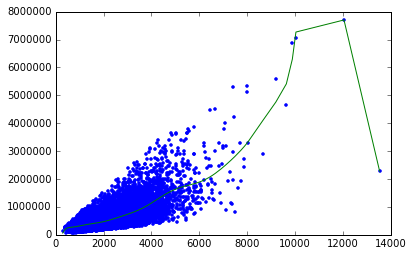

In [35]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression(normalize=True)
linreg.fit(poly_15,data['price'])
plt.plot(data['sqft_living'],data['price'],'.',
       data['sqft_living'],linreg.predict(poly_15),'-' )

In [19]:
linreg.coef_

array([  4.56404164e-91,  -2.64606373e-50,  -6.53361323e-56,
         1.69071938e-60,   9.24078176e-75,   2.68575522e-71,
         2.26147568e-67,   1.85900299e-63,   1.47144116e-59,
         1.09771012e-55,   7.43509038e-52,   4.23015578e-48,
         1.61618577e-44,  -2.49283826e-48,   9.59718336e-53])

In [20]:
l2_small_penalty = 1.5e-5

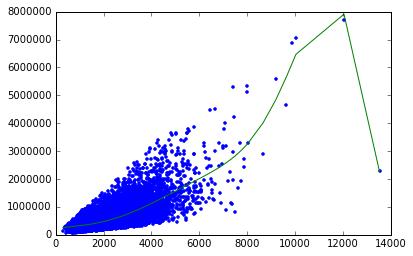

In [24]:
from sklearn.linear_model import Ridge
model1=Ridge(alpha=l2_small_penalty,normalize=True)
model1.fit(poly_15,data['price'])
plt.plot(data['sqft_living'],data['price'],'.',
       data['sqft_living'],model1.predict(poly_15),'-' )

In [25]:
model1.coef_

array([  1.24873306e+02,  -4.77376011e-02,   3.01446238e-05,
        -2.44419942e-09,  -1.94153675e-13,   8.54085686e-18,
         1.51142121e-21,   8.27979094e-26,   6.52603100e-31,
        -3.27895017e-34,  -3.87962315e-38,  -2.72437650e-42,
        -1.07790800e-46,   3.78242694e-51,   1.39790296e-54])

# -----------------------------------------------------------------------------------------------------

In [26]:
train_data=pd.read_csv('wk3_kc_house_train_data.csv')
test_data=pd.read_csv('wk3_kc_house_test_data.csv')
valid_data=pd.read_csv('wk3_kc_house_valid_data.csv')
set1_data=pd.read_csv('wk3_kc_house_set_1_data.csv')
set2_data=pd.read_csv('wk3_kc_house_set_2_data.csv')
set3_data=pd.read_csv('wk3_kc_house_set_3_data.csv')
set4_data=pd.read_csv('wk3_kc_house_set_4_data.csv')

In [27]:
train_data['sqft_living']=train_data['sqft_living'].astype(float)
valid_data['sqft_living']=valid_data['sqft_living'].astype(float)
test_data['sqft_living']=test_data['sqft_living'].astype(float)
set1_data['sqft_living']=set1_data['sqft_living'].astype(float)
set2_data['sqft_living']=set2_data['sqft_living'].astype(float)
set3_data['sqft_living']=set3_data['sqft_living'].astype(float)
set4_data['sqft_living']=set4_data['sqft_living'].astype(float)

In [28]:
train_data=train_data.sort(['sqft_living'])
test_data=test_data.sort(['sqft_living'])
set1_data=set1_data.sort(['sqft_living'])
set2_data=set2_data.sort(['sqft_living'])
set3_data=set3_data.sort(['sqft_living'])
set4_data=set4_data.sort(['sqft_living'])

In [47]:
poly15_set1_data=polynomial_sframe(set1_data['sqft_living'],15)
poly15_set1_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
0,430,184900,79507000,34188010000,1.470084e+13,6.321363e+15,2.718186e+18,1.168820e+21,5.025926e+23,2.161148e+26,9.292937e+28,3.995963e+31,1.718264e+34,7.388536e+36,3.177070e+39
1,460,211600,97336000,44774560000,2.059630e+13,9.474297e+15,4.358177e+18,2.004761e+21,9.221902e+23,4.242075e+26,1.951354e+29,8.976230e+31,4.129066e+34,1.899370e+37,8.737103e+39
2,470,220900,103823000,48796810000,2.293450e+13,1.077922e+16,5.066231e+18,2.381129e+21,1.119130e+24,5.259913e+26,2.472159e+29,1.161915e+32,5.461000e+34,2.566670e+37,1.206335e+40
3,490,240100,117649000,57648010000,2.824752e+13,1.384129e+16,6.782231e+18,3.323293e+21,1.628414e+24,7.979227e+26,3.909821e+29,1.915812e+32,9.387480e+34,4.599865e+37,2.253934e+40
4,500,250000,125000000,62500000000,3.125000e+13,1.562500e+16,7.812500e+18,3.906250e+21,1.953125e+24,9.765625e+26,4.882812e+29,2.441406e+32,1.220703e+35,6.103516e+37,3.051758e+40


In [182]:
l2_small_penalty=1.23e2

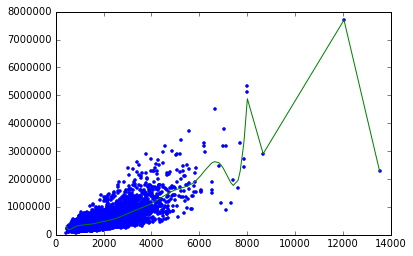

In [52]:
linreg_set1=LinearRegression(normalize=True)
linreg_set1.fit(poly15_set1_data,set1_data['price'])
plt.plot(set1_data['sqft_living'],set1_data['price'],'.',
       set1_data['sqft_living'],linreg_set1.predict(poly15_set1_data),'-' )

In [54]:
linreg_set1.coef_

array([ -8.91012706e+04,   2.65491149e+02,  -4.47330323e-01,
         4.81351032e-04,  -3.52695172e-07,   1.82766574e-10,
        -6.85191184e-14,   1.88132113e-17,  -3.79681849e-21,
         5.60425619e-25,  -5.95822864e-29,   4.42756759e-33,
        -2.17564306e-37,   6.33303039e-42,  -8.24569214e-47])

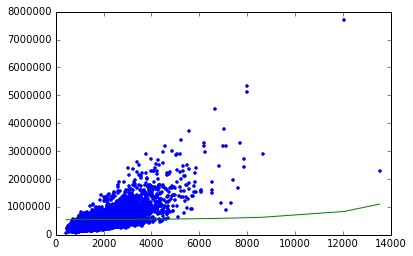

In [183]:
model1_set1=Ridge(alpha=l2_small_penalty,normalize=True)
model1_set1.fit(poly15_set1_data,set1_data['price'])
plt.plot(set1_data['sqft_living'],set1_data['price'],'.',
       set1_data['sqft_living'],model1_set1.predict(poly15_set1_data),'-' )

In [184]:
model1_set1.coef_

array([  2.32806803e+00,   3.53621608e-04,   3.31969692e-08,
         2.00082477e-12,   1.11492559e-16,   6.57786122e-21,
         4.12939525e-25,   2.70393755e-29,   1.81614763e-33,
         1.23824277e-37,   8.51872481e-42,   5.89455598e-46,
         4.09542560e-50,   2.85464889e-54,   1.99547476e-58])

In [56]:
poly15_set2_data=polynomial_sframe(set2_data['sqft_living'],15)

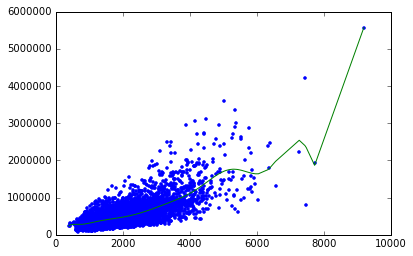

In [57]:
linreg_set2=LinearRegression(normalize=True)
linreg_set2.fit(poly15_set2_data,set2_data['price'])
plt.plot(set2_data['sqft_living'],set2_data['price'],'.',
       set2_data['sqft_living'],linreg_set2.predict(poly15_set2_data),'-' )

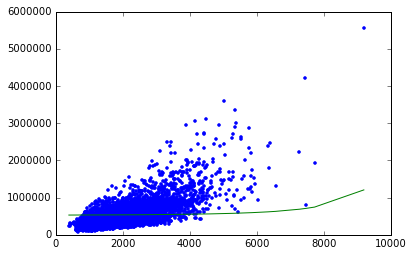

In [185]:
model1_set2=Ridge(alpha=l2_small_penalty,normalize=True)
model1_set2.fit(poly15_set2_data,set2_data['price'])
plt.plot(set2_data['sqft_living'],set2_data['price'],'.',
       set2_data['sqft_living'],model1_set2.predict(poly15_set2_data),'-' )

In [186]:
model1_set2.coef_

array([  2.09756903e+00,   3.90817483e-04,   6.67189944e-08,
         8.90002997e-12,   9.72639877e-16,   9.69733682e-20,
         9.50564475e-24,   9.44491031e-28,   9.57191338e-32,
         9.86945155e-36,   1.03101115e-39,   1.08729784e-43,
         1.15453748e-47,   1.23211305e-51,   1.31986696e-55])

In [63]:
poly15_set3_data=polynomial_sframe(set3_data['sqft_living'],15)

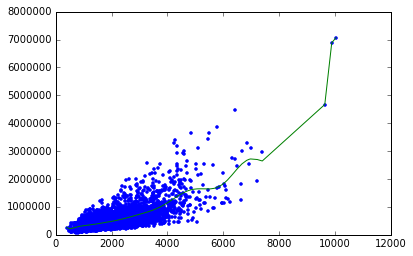

In [64]:
linreg_set3=LinearRegression(normalize=True)
linreg_set3.fit(poly15_set3_data,set3_data['price'])
plt.plot(set3_data['sqft_living'],set3_data['price'],'.',
       set3_data['sqft_living'],linreg_set3.predict(poly15_set3_data),'-' )

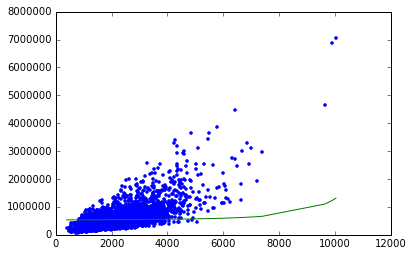

In [187]:
model1_set3=Ridge(alpha=l2_small_penalty,normalize=True)
model1_set3.fit(poly15_set3_data,set3_data['price'])
plt.plot(set3_data['sqft_living'],set3_data['price'],'.',
       set3_data['sqft_living'],model1_set3.predict(poly15_set3_data),'-' )

In [188]:
model1_set3.coef_

array([  2.28906258e+00,   4.12472190e-04,   6.08835345e-08,
         6.58572163e-12,   6.15278155e-16,   5.64446634e-20,
         5.28834396e-24,   5.07091402e-28,   4.94657273e-32,
         4.88043809e-36,   4.85009106e-40,   4.84161534e-44,
         4.84635021e-48,   4.85883628e-52,   4.87558469e-56])

In [67]:
poly15_set4_data=polynomial_sframe(set4_data['sqft_living'],15)

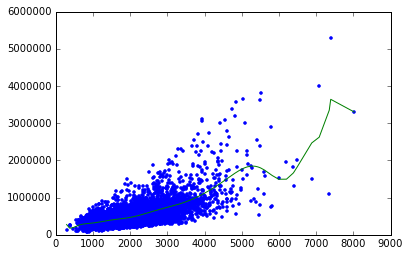

In [69]:
linreg_set4=LinearRegression(normalize=True)
linreg_set4.fit(poly15_set4_data,set4_data['price'])
plt.plot(set4_data['sqft_living'],set4_data['price'],'.',
       set4_data['sqft_living'],linreg_set4.predict(poly15_set4_data),'-' )

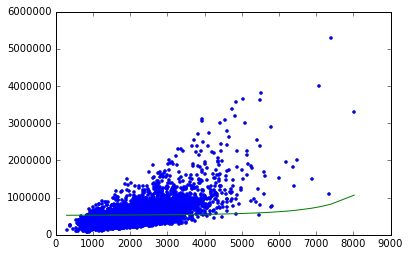

In [189]:
model1_set4=Ridge(alpha=l2_small_penalty,normalize=True)
model1_set4.fit(poly15_set4_data,set4_data['price'])
plt.plot(set4_data['sqft_living'],set4_data['price'],'.',
       set4_data['sqft_living'],model1_set4.predict(poly15_set4_data),'-' )

In [190]:
model1_set4.coef_

array([  2.08596194e+00,   4.05035772e-04,   7.46864647e-08,
         1.13096608e-11,   1.45864442e-15,   1.73561251e-19,
         2.01609632e-23,   2.34605255e-27,   2.75636073e-31,
         3.27043069e-35,   3.91046855e-39,   4.70118041e-43,
         5.67212304e-47,   6.85958087e-51,   8.30843630e-55])

# -----------------------------------------------------------------------------------------------------

In [72]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv')

In [73]:
train_valid_shuffled.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000,4,2.50,2800,5900,1,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580,5900
1,1703050500,20150321T000000,645000,3,2.50,2490,5978,2,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710,6629
2,5700002325,20140605T000000,640000,3,1.75,2340,4206,1,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360,4725
3,475000510,20141118T000000,594000,3,1.00,1320,5000,1,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700,5000
4,844001052,20150128T000000,365000,4,2.50,1904,8200,2,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560,12426


In [98]:
train_valid_shuffled['sqft_living']=train_valid_shuffled['sqft_living'].astype(float)
train_valid_shuffled=train_valid_shuffled.sort('sqft_living')

In [99]:
valid15_shuffled=polynomial_sframe(train_valid_shuffled['sqft_living'],15)

In [163]:
valid15_shuffled.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
2620,290,84100,24389000,7072810000,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
16397,370,136900,50653000,18741610000,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
14794,380,144400,54872000,20851360000,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
4985,384,147456,56623104,21743271936,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
8695,390,152100,59319000,23134410000,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [164]:
def get_residual_sum_of_squares(model, f, output):
    """
    Purpose: Compute Residual Sum of Squares (RSS)
    Input  : features (x), output (y) and estimated model 
    Output : Residual sum of squares = sum((actual output (y) - predicted output)^2)
    """
    RSS = np.sum((output -f)** 2)
    return(RSS)

In [76]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [89]:
train_valid_shuffled[0:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000,4,2.50,2800,5900,1,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580,5900
1,1703050500,20150321T000000,645000,3,2.50,2490,5978,2,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710,6629
2,5700002325,20140605T000000,640000,3,1.75,2340,4206,1,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360,4725
3,475000510,20141118T000000,594000,3,1.00,1320,5000,1,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700,5000
4,844001052,20150128T000000,365000,4,2.50,1904,8200,2,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560,12426
5,2781280290,20150427T000000,305000,3,2.50,1610,3516,2,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610,3056
6,2214800630,20141105T000000,239950,3,2.25,1560,8280,2,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920,8120
7,2114700540,20141021T000000,366000,3,2.50,1320,4320,1,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190,4200
8,2596400050,20140730T000000,375000,3,1.00,1960,7955,1,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850,8219
9,4140900050,20150126T000000,440000,4,1.75,2180,10200,1,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.270,2590,10445


In [90]:
from sklearn import metrics

In [104]:
penalties=np.logspace(3, 9, num=13)

In [176]:
def k_fold_cross_validation(k,penalties,data, output):
    m={}
    for penalty in penalties:
        l2_penalty=penalty
        names='rss_dict_'+str(penalty)
        names={}
        n = len(data)
        for i in range(k):
            start =(n*i)/k
            end = (n*(i+1))/k-1
            x=data[0:start].append(data[end+1:n])
            y=output[0:start].append(output[end+1:n])
            model=Ridge(alpha=l2_penalty,normalize=True)
            model.fit(x,y)
            name='rss_'+str(i)
            rss=(metrics.mean_squared_error(output[start:end+1],model.predict(data[start:end+1])))*(n/k)
            #rss=get_residual_sum_of_squares(model, model.predict(data[start:end+1]),output[start:end+1])
            names[name]=rss
        m[str(penalty)]=names
    return(m)

In [177]:
d=k_fold_cross_validation(10,penalties, valid15_shuffled, train_valid_shuffled['price'])

In [178]:
penalty_dataframe=pd.DataFrame(d)

In [179]:
penalty_dataframe

,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1000000000.0,3162.27766017,31622.7766017,316227.766017,3162277.66017,31622776.6017,316227766.017
rss_0,1.570394e+14,1.577309e+14,1.578004e+14,1.578074e+14,1.578081e+14,1.578082e+14,1.578082e+14,1.575642e+14,1.577837e+14,1.578057e+14,1.578079e+14,1.578081e+14,1.578082e+14
rss_1,1.175682e+14,1.180056e+14,1.180495e+14,1.180539e+14,1.180544e+14,1.180544e+14,1.180544e+14,1.179001e+14,1.180390e+14,1.180529e+14,1.180543e+14,1.180544e+14,1.180544e+14
rss_2,9.823321e+13,9.854251e+13,9.857361e+13,9.857672e+13,9.857703e+13,9.857707e+13,9.857707e+13,9.846791e+13,9.856614e+13,9.857598e+13,9.857696e+13,9.857706e+13,9.857707e+13
rss_3,8.373735e+13,8.392524e+13,8.394414e+13,8.394603e+13,8.394622e+13,8.394624e+13,8.394624e+13,8.387992e+13,8.393960e+13,8.394558e+13,8.394618e+13,8.394624e+13,8.394624e+13
rss_4,7.823293e+13,7.835113e+13,7.836302e+13,7.836421e+13,7.836433e+13,7.836434e+13,7.836434e+13,7.832262e+13,7.836016e+13,7.836392e+13,7.836430e+13,7.836433e+13,7.836434e+13
rss_5,7.652664e+13,7.656467e+13,7.656850e+13,7.656889e+13,7.656892e+13,7.656893e+13,7.656893e+13,7.655550e+13,7.656758e+13,7.656879e+13,7.656892e+13,7.656893e+13,7.656893e+13
rss_6,8.114354e+13,8.114720e+13,8.114757e+13,8.114760e+13,8.114761e+13,8.114761e+13,8.114761e+13,8.114632e+13,8.114748e+13,8.114760e+13,8.114761e+13,8.114761e+13,8.114761e+13
rss_7,1.206902e+14,1.207493e+14,1.207553e+14,1.207559e+14,1.207559e+14,1.207559e+14,1.207559e+14,1.207351e+14,1.207538e+14,1.207557e+14,1.207559e+14,1.207559e+14,1.207559e+14
rss_8,2.610931e+14,2.615256e+14,2.615690e+14,2.615734e+14,2.615738e+14,2.615739e+14,2.615739e+14,2.614213e+14,2.615586e+14,2.615723e+14,2.615737e+14,2.615738e+14,2.615739e+14
rss_9,2.678617e+24,2.758695e+22,2.765926e+20,2.758749e+18,2.842445e+16,2.003762e+15,1.827893e+15,2.739217e+23,2.764683e+21,2.764357e+19,2.751754e+17,4.259061e+15,1.829222e+15


In [181]:
(penalty_dataframe.sum(axis=0))/10

1000.0           2.678617e+23
10000.0          2.758695e+21
100000.0         2.765937e+19
1000000.0        2.759826e+17
10000000.0       2.950124e+15
100000000.0      3.080558e+14
1000000000.0     2.904689e+14
3162.27766017    2.739217e+22
31622.7766017    2.764685e+20
316227.766017    2.764464e+18
3162277.66017    2.762522e+16
31622776.6017    5.335857e+14
316227766.017    2.906019e+14
dtype: float64